Charger l'image.

(1200, 819, 3)


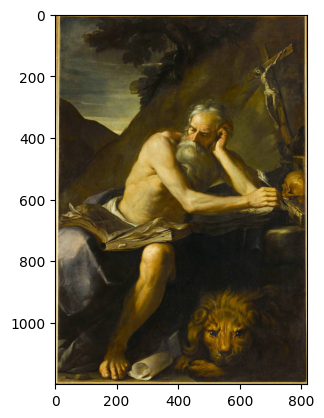

In [13]:
import skimage as ski
import matplotlib.pyplot as plt

image = ski.io.imread("data/st jerome.jpg")

plt.imshow(image)
print(image.shape)

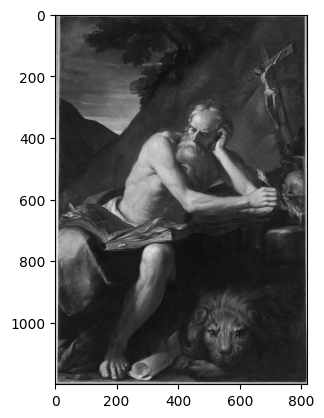

In [2]:
image = ski.color.rgb2gray(image)
plt.imshow(image, cmap="gray")

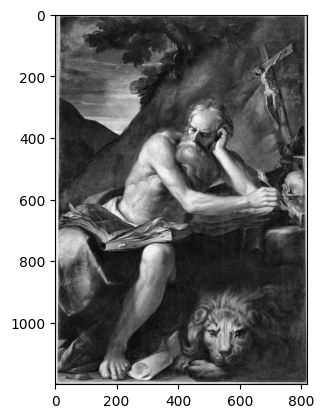

In [3]:
from skimage import exposure

image = exposure.equalize_adapthist(image)
plt.imshow(image, cmap="gray")

Trouver les bords de l'image.

-0.09376914596367754


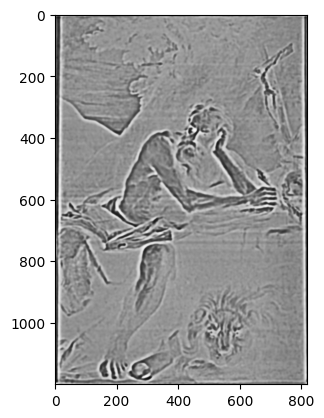

In [33]:
import numpy as np
from sklearn.preprocessing import normalize

edge_image = ski.color.rgb2gray(ski.filters.difference_of_gaussians(image, 3))
plt.imshow(exposure.equalize_adapthist(normalize(1 - edge_image), ),cmap="gray")
print(np.min(edge_image))

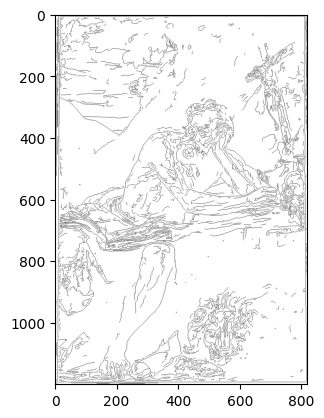

In [ ]:
import numpy as np
from skimage.morphology import skeletonize
edge_image = 1 - skeletonize(edge_image)
plt.imshow(edge_image, cmap="gray")

Regrouper les bords de l'image en composantes connexes.

In [ ]:
from edge_walker import group_edges

edge_groups = group_edges(edge_image)

In [ ]:
print(len(edge_groups))

2249


<Axes: ylabel='Count'>

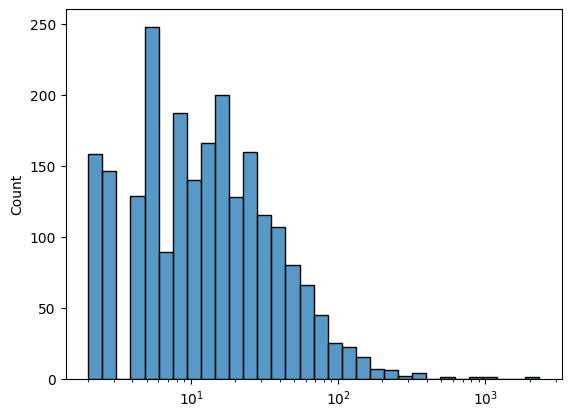

In [ ]:
edge_group_lens = []
for g in edge_groups:
    edge_group_lens.append(len(g))

import seaborn as sns

sns.histplot(edge_group_lens, log_scale=True)
#hist = plt.hist(edge_group_lens)

Filter and scale edges.

In [ ]:
min_edge_length = 10
step = 5

max_length=max(image.shape[0], image.shape[1])

filtered_edge_groups = []

for point_group in edge_groups:
    if len(point_group) >= min_edge_length:
        filtered_edge_groups.append(point_group[::step].copy()/max_length)

print(f'there are {len(filtered_edge_groups)} groups that are greather than {min_edge_length}')
maximum = np.max(edge_group_lens)
filtered_indexes = []

print(f'the longest edge is {maximum} points long')
for i in range(maximum,0,-1):
    if len(filtered_indexes)>800:
        break
    for id_point_group in range(len(filtered_edge_groups)):
        if len(filtered_edge_groups[id_point_group]) == i:
            filtered_indexes.append(id_point_group)
size_groups = len(filtered_indexes)
print(f'We have made {size_groups} final groups')

copy_filtered_edge = []
for idx in range(len(filtered_edge_groups)):
    if idx in filtered_indexes:
        copy_filtered_edge.append(filtered_edge_groups[idx])
filtered_edge_groups = copy_filtered_edge

there are 1292 groups that are greather than 10
the longest edge is 2320 points long
We have made 928 final groups


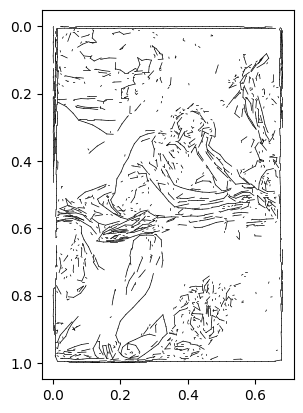

In [ ]:
import matplotlib.colors as mcolors
cs = list(mcolors.XKCD_COLORS.values())*1000


plt.gca().invert_yaxis()
for c, point_group in zip(cs, filtered_edge_groups):
    preceding_point = point_group[0]
    for p in point_group[1::step]:
        plt.plot((preceding_point[0], p[0]), (preceding_point[1], p[1]), c="black", linewidth=0.5)
        preceding_point = p.copy()

plt.gca().set_aspect("equal")

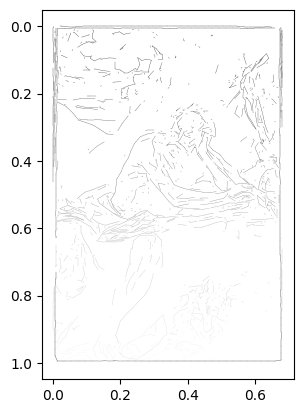

In [ ]:
plt.gca().invert_yaxis()
ids=0
for point_group in filtered_edge_groups:
    ids+=1
    preceding_point = point_group[0]
    for p in point_group[1::step]:
        plt.plot((preceding_point[0], p[0]), (preceding_point[1], p[1]), c=[ids/size_groups,ids/size_groups,ids/size_groups], linewidth=0.2)
        preceding_point = p.copy()

plt.gca().set_aspect("equal")